In [1]:
import sys
import os

# Get the directory path of the notebook
notebook_directory = os.path.dirname(os.path.abspath("__file__"))

# Get the directory path of the project (one level up)
project_directory = os.path.dirname(notebook_directory)

# Add the project directory to the Python module search path
sys.path.append(project_directory)

# Now you can import the LoadJSON module from DataLoaderLocal
from shared_utilities.DataLoaderLocal import LoadReviews

import pandas as pd
import utility_func as utils
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.metrics import mean_squared_error
import numpy as np

# Adjust display options to show all columns
pd.set_option('display.max_columns', None)

In [2]:
reviews = LoadReviews()

utils.YelpDatasets_Revies(reviews_df = reviews)


Reviews DataFrame's head:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [3]:
reviews = reviews.sample(n=50000, random_state=42)
display(reviews)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
1295256,J5Q1gH4ACCj6CtQG7Yom7g,56gL9KEJNHiSDUoyjk2o3Q,8yR12PNSMo6FBYx1u5KPlw,2,1,0,0,Went for lunch and found that my burger was me...,2018-04-04 21:09:53
3297618,HlXP79ecTquSVXmjM10QxQ,bAt9OUFX9ZRgGLCXG22UmA,pBNucviUkNsiqhJv5IFpjg,5,0,0,0,I needed a new tires for my wife's car. They h...,2020-05-24 12:22:14
1217795,JBBULrjyGx6vHto2osk_CQ,NRHPcLq2vGWqgqwVugSgnQ,8sf9kv6O4GgEb0j1o22N1g,5,0,0,0,Jim Woltman who works at Goleta Honda is 5 sta...,2019-02-14 03:47:48
3730348,U9-43s8YUl6GWBFCpxUGEw,PAxc0qpqt5c2kA0rjDFFAg,XwepyB7KjJ-XGJf0vKc6Vg,4,0,0,0,Been here a few times to get some shrimp. The...,2013-04-27 01:55:49
1826590,8T8EGa_4Cj12M6w8vRgUsQ,BqPR1Dp5Rb_QYs9_fz9RiA,prm5wvpp0OHJBlrvTj9uOg,5,0,0,0,This is one fantastic place to eat whether you...,2019-05-15 18:29:25
...,...,...,...,...,...,...,...,...,...
4370202,ggBVjncLGaFcZuTMTowdzQ,cV249zT-6-ebc55E097mcw,H3Tmgv94pbGvBIKZ4Rs9Cw,3,0,0,0,I got the seared snapper with butternut squash...,2015-10-22 13:44:25
2440848,S_i_zK_VIxnxCz7eHoQskQ,rL5uMarIYnEMgDr09pafqg,MbNcVhRqpNPcvgFzWgaxSQ,4,9,4,9,After just one visit I knew I would be a fan o...,2015-08-22 13:04:32
6844225,t_hAiTVFLXqEW4mhkWQdYQ,RQdUrCQAgDx4ZTnWk9PDkg,rErcCh6baqUXkJUbGJZb5Q,1,0,0,0,I had been using Ambler Savings for as long as...,2021-08-11 18:51:16
3097922,qnVvfW-6jdYxPmDXMC46-g,oeBfz1fCDrX9p-6cfTF_cw,LfWs66gXWB7KYolW6xAu-g,5,0,0,0,Some of the best Italian in Edmonton the way t...,2017-04-06 00:50:32


In [4]:
# change the structure of date column
reviews['date'] = pd.to_datetime(reviews['date']).dt.strftime('%Y-%m')

In [5]:
#group by date and review_id to get the number of reviews per month and year
reviews_per_month = reviews.groupby(['date'])['review_id'].count().reset_index()
reviews_per_month.columns = ['date', 'count']
reviews_per_month['date'] = pd.to_datetime(reviews_per_month['date'])
reviews_per_month = reviews_per_month.sort_values(by='date')
reviews_per_month.head()

,date,count
0,2005-03-01,1
1,2005-04-01,1
2,2005-05-01,1
3,2005-07-01,1
4,2006-01-01,3


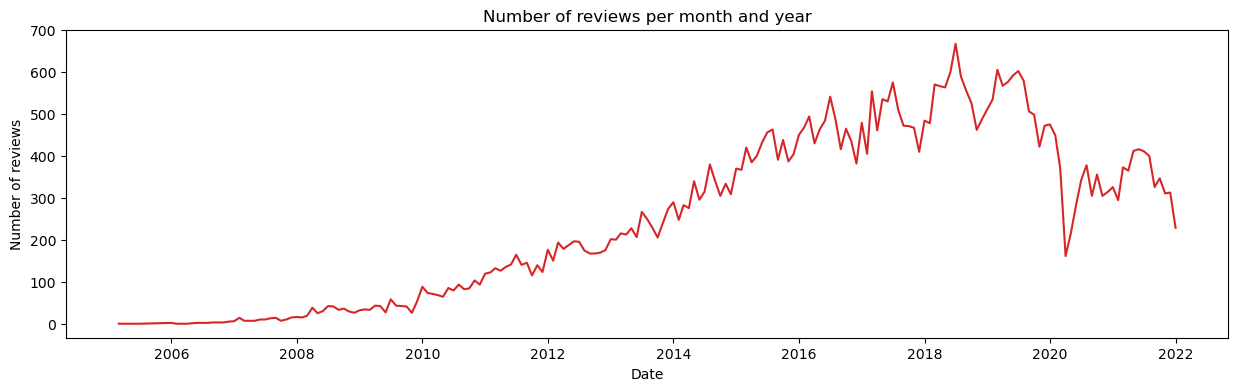

In [6]:
def plot_df(reviews_per_month, x, y, title="", xlabel='Date', ylabel='Number of reviews', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(reviews_per_month, x=reviews_per_month['date'], y=reviews_per_month['count'], title='Number of reviews per month and year')

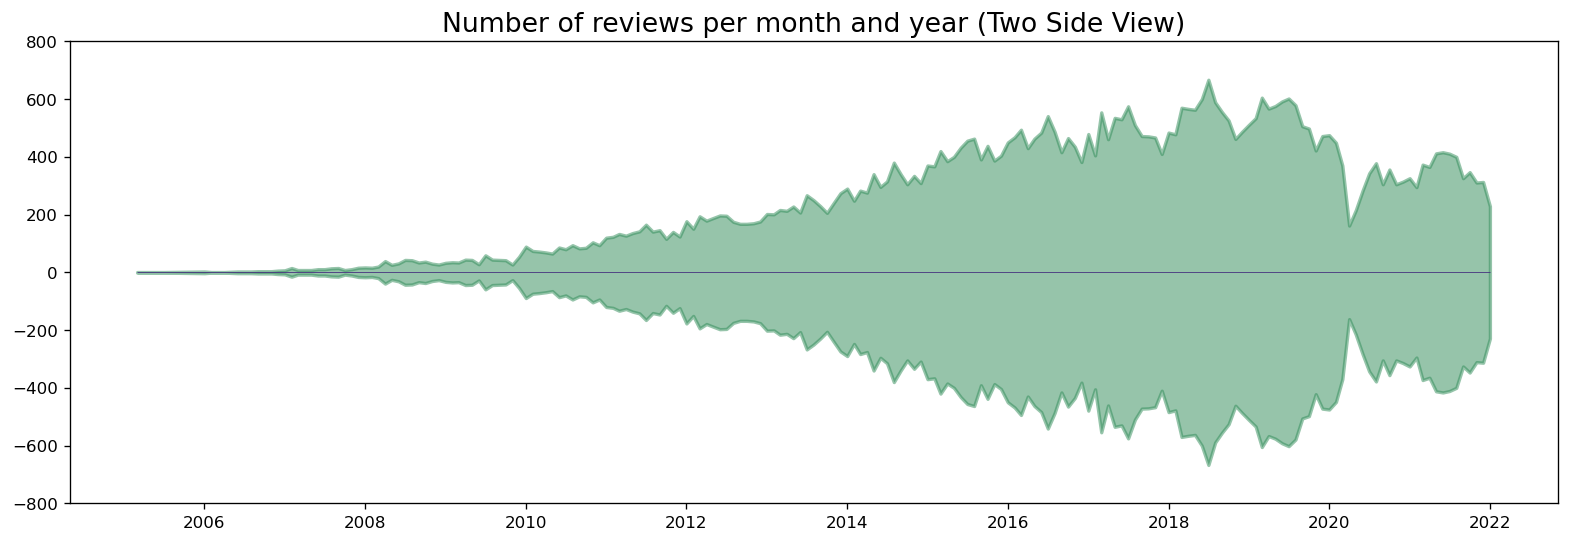

In [21]:
#Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

x = reviews_per_month['date'].values
y1 = reviews_per_month['count'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Number of reviews per month and year (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(reviews_per_month['date']), xmax=np.max(reviews_per_month['date']), linewidth=.5)
plt.show()

In [12]:
#count reviews per business and year
reviews
# Extracting the year from the date
count_rev_bus = reviews.groupby(['business_id', 'date'])['review_id'].count().reset_index()
count_rev_bus.columns = ['business_id', 'date', 'count']
count_rev_bus['date'] = pd.to_datetime(count_rev_bus['date'])
count_rev_bus = count_rev_bus.sort_values(by=['date','business_id'])
count_rev_bus['year'] = count_rev_bus['date'].dt.year
count_rev_bus.head()

,business_id,date,count,year
28324,ZWQKlFu_fFzMkkn5mWkfSQ,2005-03-01,1,2005
38345,lby9eFupu2hzjJ6PWwINDg,2005-04-01,1,2005
25758,W4bi5Yeo9ncXRqcxG58U9w,2005-05-01,1,2005
9797,Bf1cdbdHXi8Omlkc7KShkg,2005-07-01,1,2005
19389,OCO8wkWzi0CfqW2ba2q00A,2006-01-01,1,2006


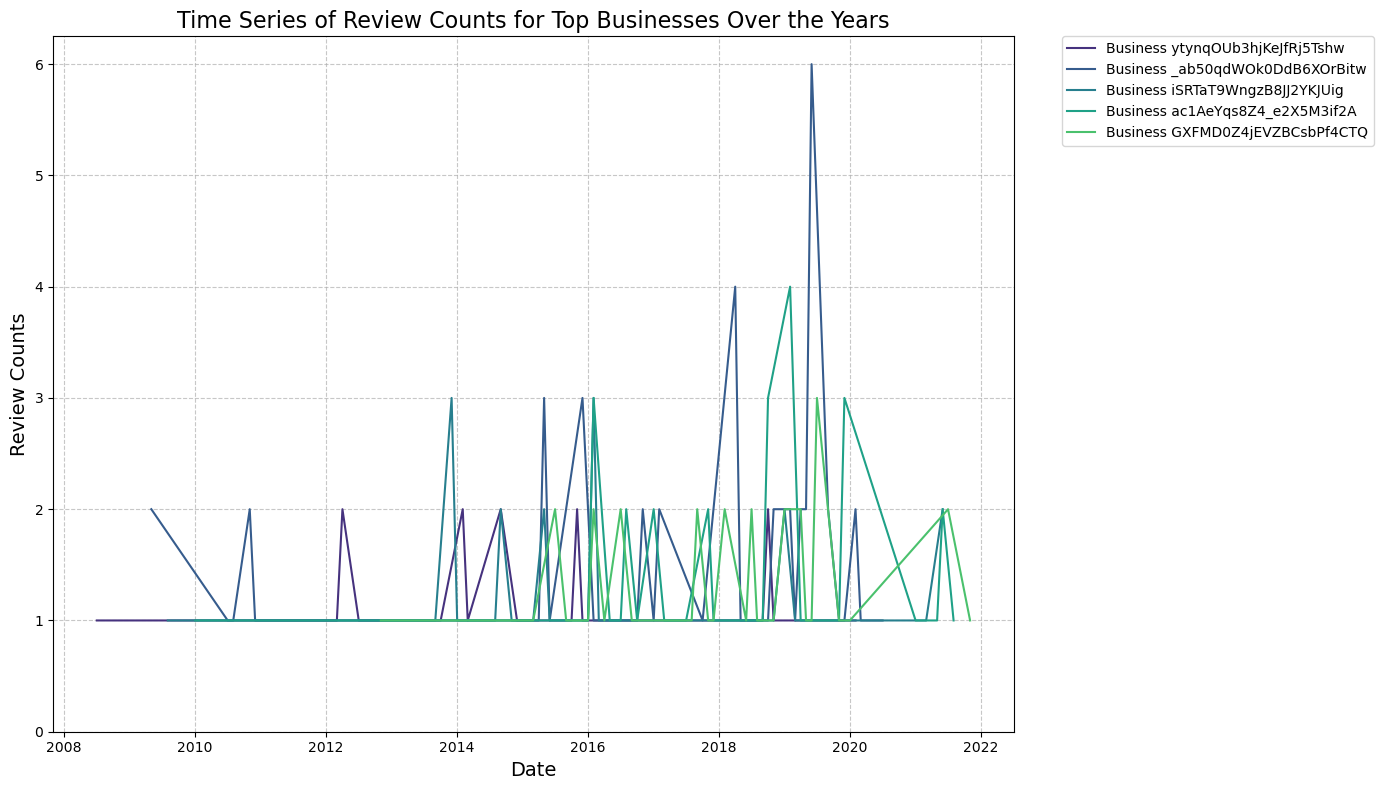

In [19]:
def plot_top_businesses_over_time(df, top_businesses_series):
    """
    Plot the time series of review counts for the top businesses over the years.

    Parameters:
    - df: DataFrame with columns 'business_id', 'date', 'count', and 'year'.
    - top_businesses_series: Pandas Series with the top businesses and their review counts.
    """
    # Convert the Series to a DataFrame
    top_businesses_df = top_businesses_series.reset_index()

    # Filter the DataFrame to include only the top businesses
    top_businesses_df = df[df['business_id'].isin(top_businesses_df['business_id'])]

    # Plotting
    plt.figure(figsize=(14, 8))
    sns.set_palette("viridis")  # You can choose a different color palette if needed

    for business_id in top_businesses_df['business_id'].unique():
        business_data = top_businesses_df[top_businesses_df['business_id'] == business_id]
        sns.lineplot(x='date', y='count', data=business_data, label=f'Business {business_id}')

    plt.title('Time Series of Review Counts for Top Businesses Over the Years', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Review Counts', fontsize=14)
    plt.legend()
    
    # Set y-axis limits to start from 0
    plt.ylim(bottom=0)
    
    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add a legend outside the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    # Tight layout for better spacing
    plt.tight_layout()
    
    plt.show()

# Example usage:
# Assuming you have a list of top businesses called 'top_businesses_list'
top_businesses_series = count_rev_bus.groupby(['business_id'])['count'].sum().sort_values(ascending=False).head(5)
plot_top_businesses_over_time(count_rev_bus, top_businesses_series)